LAB 04 - Redes Neurais

Thais Damasceno - 11721BCC007

1) Carregue o dataset MNIST.

Instala as bibliotecas necessárias para aprendizado de máquina (scikit-learn), visualização de gráficos (matplotlib) e redes neurais profundas (tensorflow).

In [39]:
pip install scikit-learn matplotlib tensorflow

In [45]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


# 1) Carregando o dataset MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)
print("Dataset carregado.")

# Normalizando os dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Dataset normalizado e dividido em treino/teste.")

Dataset carregado.
Dataset normalizado e dividido em treino/teste.


2) Aplique o classificador MLPClassifier.

In [46]:
# Criando e treinando o modelo MLP
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu',
                    learning_rate_init=0.001, max_iter=300, random_state=42)
mlp.fit(X_train, y_train)

# Fazendo previsões e avaliando
y_pred_mlp = mlp.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"Acurácia do MLPClassifier: {accuracy_mlp:.4f}")

Acurácia do MLPClassifier: 0.9680


3) Plote a matriz de confusão.

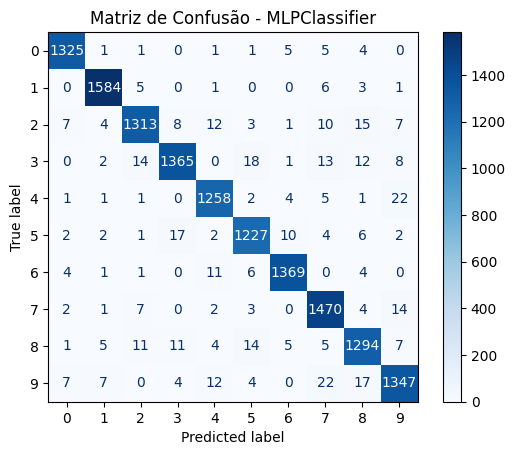

In [47]:
# Gerando a matriz de confusão
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp)
disp_mlp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - MLPClassifier")
plt.show()

4) Gere gráficos comparando a taxa de acerto para diferentes números de neurônios na camada escondida, diferentes funções de ativação, e diferentes taxas de aprendizado.

Acurácia com (50,): 0.9642
Acurácia com (100,): 0.9696
Acurácia com (50, 50): 0.9636
Acurácia com (100, 50, 25): 0.9716


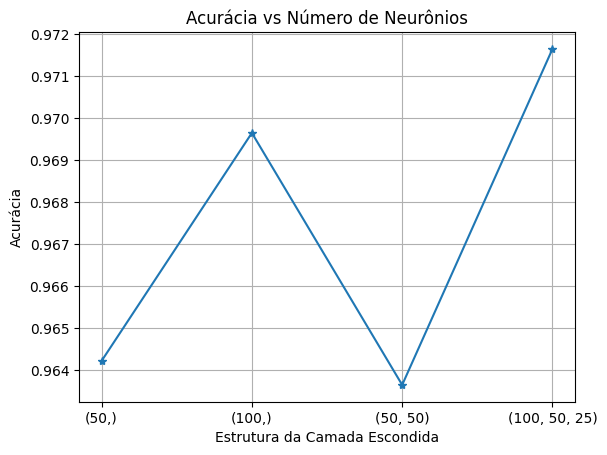

Acurácia com ativação relu: 0.9696
Acurácia com ativação tanh: 0.9616
Acurácia com ativação logistic: 0.9613


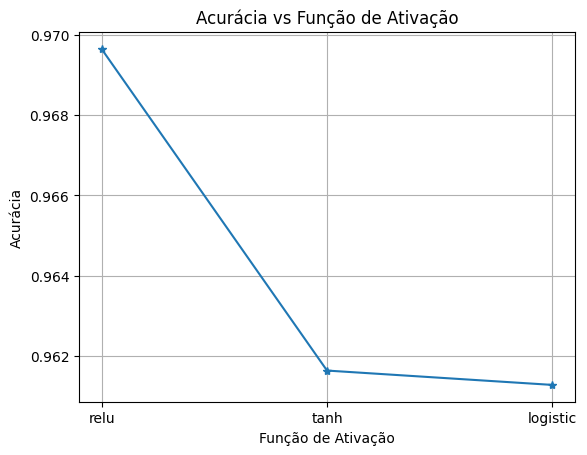

Acurácia com taxa de aprendizado 0.001: 0.9696
Acurácia com taxa de aprendizado 0.01: 0.9680
Acurácia com taxa de aprendizado 0.1: 0.9689


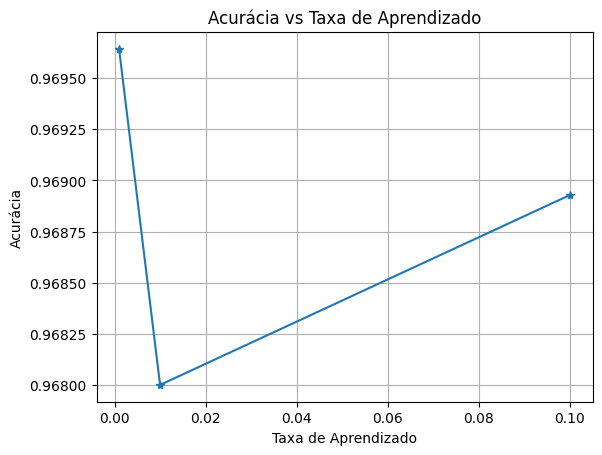

In [48]:
# Testando diferentes arquiteturas para a camada escondida do MLP
hidden_layer_sizes = [(50,), (100,), (50, 50), (100, 50, 25)]  # Diferentes configurações de neurônios
accuracies_neurons = []  # Lista para armazenar as acurácias

# Loop para treinar e avaliar cada arquitetura
for hls in hidden_layer_sizes:
    mlp_model = MLPClassifier(hidden_layer_sizes=hls, max_iter=200, early_stopping=True, random_state=42)
    mlp_model.fit(X_train, y_train)  # Treina o modelo
    y_pred = mlp_model.predict(X_test)  # Faz previsões
    acc = accuracy_score(y_test, y_pred)  # Calcula a acurácia
    accuracies_neurons.append(acc)
    print(f"Acurácia com {hls}: {acc:.4f}")

# Gráfico da acurácia em função das camadas escondidas
plt.plot([str(h) for h in hidden_layer_sizes], accuracies_neurons, marker='*')
plt.title("Acurácia vs Número de Neurônios")
plt.xlabel("Estrutura da Camada Escondida")
plt.ylabel("Acurácia")
plt.grid(True)
plt.show()


# Testando diferentes funções de ativação
activation_functions = ['relu', 'tanh', 'logistic']
accuracies_activation = []

# Loop para avaliar cada função de ativação
for func in activation_functions:
    mlp_model = MLPClassifier(activation=func, max_iter=200, early_stopping=True, random_state=42)
    mlp_model.fit(X_train, y_train)  # Treinamento
    y_pred = mlp_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)  # Acurácia
    accuracies_activation.append(acc)
    print(f"Acurácia com ativação {func}: {acc:.4f}")

# Gráfico da acurácia em função da função de ativação
plt.plot(activation_functions, accuracies_activation, marker='*')
plt.title("Acurácia vs Função de Ativação")
plt.xlabel("Função de Ativação")
plt.ylabel("Acurácia")
plt.grid(True)
plt.show()


# Testando diferentes taxas de aprendizado
learning_rates = [0.001, 0.01, 0.1]
accuracies_lr = []

# Loop para avaliar cada taxa de aprendizado
for lr in learning_rates:
    mlp_model = MLPClassifier(learning_rate_init=lr, max_iter=200, early_stopping=True, random_state=42)
    mlp_model.fit(X_train, y_train)  # Treinamento
    y_pred = mlp_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)  # Acurácia
    accuracies_lr.append(acc)
    print(f"Acurácia com taxa de aprendizado {lr}: {acc:.4f}")

# Gráfico da acurácia em função da taxa de aprendizado
plt.plot(learning_rates, accuracies_lr, marker='*')
plt.title("Acurácia vs Taxa de Aprendizado")
plt.xlabel("Taxa de Aprendizado")
plt.ylabel("Acurácia")
plt.grid(True)
plt.show()


---

Com base nos experimentos realizados utilizando o *MLPClassifier* no dataset MNIST, foi possível observar que a arquitetura da rede, a função de ativação e a taxa de aprendizado influenciam significativamente o desempenho do classificador. A melhor combinação testada foi uma arquitetura com três camadas ocultas contendo 100, 50 e 25 neurônios, utilizando a função de ativação ReLU e uma taxa de aprendizado de 0.001, resultando em uma acurácia de aproximadamente 97,16%. Esses resultados demonstram que redes mais profundas com ativação ReLU e aprendizado mais gradual tendem a generalizar melhor, sendo mais eficazes na tarefa de reconhecimento de dígitos manuscritos do MNIST.

---


5) Bônus: compare os resultados com os mesmos resultados para uma Rede Neural Convolutiva (CNN).

Treinando e avaliando uma Rede Neural Convolutiva (CNN)
Epoch 1/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 44s 97ms/step - accuracy: 0.8452 - loss: 0.5161 - val_accuracy: 0.9764 - val_loss: 0.0796
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 84s 102ms/step - accuracy: 0.9800 - loss: 0.0642 - val_accuracy: 0.9841 - val_loss: 0.0493
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 81s 99ms/step - accuracy: 0.9878 - loss: 0.0413 - val_accuracy: 0.9844 - val_loss: 0.0498
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 81s 97ms/step - accuracy: 0.9905 - loss: 0.0308 - val_accuracy: 0.9870 - val_loss: 0.0404
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 81s 95ms/step - accuracy: 0.9920 - loss: 0.0243 - val_accuracy: 0.9879 - val_loss: 0.0369
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 85s 103ms/step - accuracy: 0.9942 - loss: 0.0194 - val_accuracy: 0.9884 - val_loss: 0.0386
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 80s 97ms/step - accuracy: 0.9943 - loss: 0.0163 - val_accuracy: 0.9892 - val_loss: 0.0323
Epoch 8/10
438/438 ━━━━━━━━━━━━━

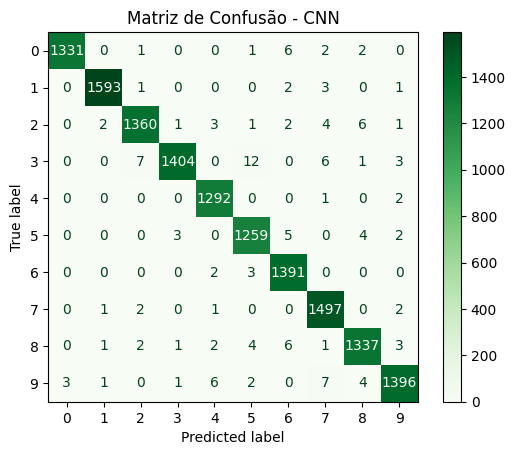

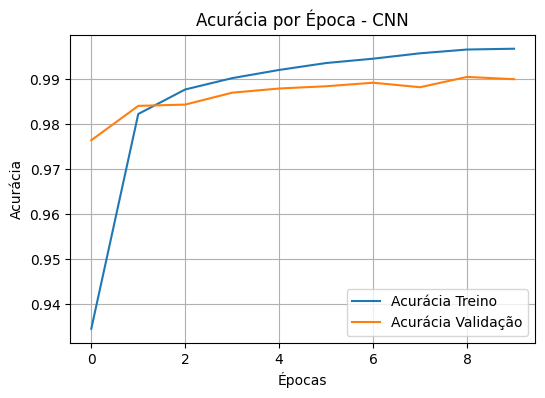

In [49]:
print("Treinando e avaliando uma Rede Neural Convolutiva (CNN)")

# Recarregando os dados brutos sem padronização para CNN
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X_raw, y_raw = mnist.data, mnist.target.astype(int)

# Normalizando para [0,1] e convertendo para float32
X_raw = X_raw.astype('float32') / 255.0

# Convertendo para formato imagem (28x28x1)
X_cnn = X_raw.reshape(-1, 28, 28, 1)

# Convertendo os rótulos para one-hot
y_cnn = keras.utils.to_categorical(y_raw, num_classes=10)

# Dividindo os dados em treino e teste (80/20)
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X_cnn, y_cnn, test_size=0.2, random_state=42)

# Definindo a CNN
model_cnn = keras.models.Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilando o modelo
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinando a CNN
history_cnn = model_cnn.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=128,
                            validation_data=(X_test_cnn, y_test_cnn), verbose=1)

# Avaliando
loss_cnn, accuracy_cnn = model_cnn.evaluate(X_test_cnn, y_test_cnn, verbose=0)
print(f"Acurácia da CNN: {accuracy_cnn:.4f}")

# Matriz de confusão
y_pred_probs = model_cnn.predict(X_test_cnn)
y_pred_cnn = np.argmax(y_pred_probs, axis=1)
y_true_cnn = np.argmax(y_test_cnn, axis=1)

cm_cnn = confusion_matrix(y_true_cnn, y_pred_cnn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_cnn)
disp.plot(cmap=plt.cm.Greens)
plt.title("Matriz de Confusão - CNN")
plt.show()

# Curvas de aprendizado
plt.figure(figsize=(6, 4))
plt.plot(history_cnn.history['accuracy'], label='Acurácia Treino')
plt.plot(history_cnn.history['val_accuracy'], label='Acurácia Validação')
plt.title('Acurácia por Época - CNN')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.show()


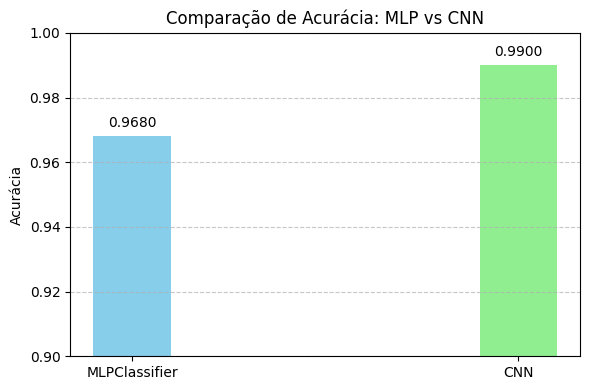

In [51]:
import matplotlib.pyplot as plt

models = ['MLPClassifier', 'CNN']
accuracies = [0.9680, 0.9900]
colors = ['skyblue', 'lightgreen']

plt.figure(figsize=(6, 4))
bars = plt.bar(models, accuracies, color=colors, width=0.2)

plt.ylim(0.90, 1.00)
plt.ylabel('Acurácia')
plt.title('Comparação de Acurácia: MLP vs CNN')

# Adiciona valores nas barras
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.002, f'{acc:.4f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


O modelo MLP obteve uma acurácia de 96,80%, enquanto a CNN alcançou uma acurácia superior, de 99%. Essa diferença evidencia a capacidade das redes convolucionais em capturar melhor padrões espaciais e hierárquicos em imagens, como as de dígitos manuscritos. Embora o MLP tenha tido um bom desempenho, a CNN demonstrou maior eficiência na tarefa de classificação, reforçando sua adequação para problemas envolvendo dados visuais.